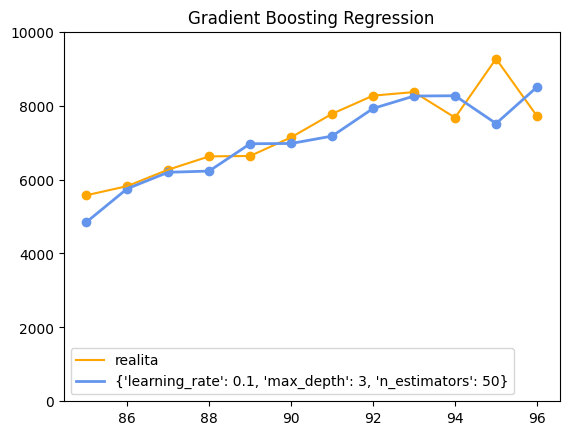

R2: 0.7779016262508344
Root Mean Squared Error: 669.7101966118469


GradientBoostingRegressor(loss='absolute_error', n_estimators=50)

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Load and split the data into train and test sets
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-1:])
df_train = df.drop(df.index[-12:])
df_test = df.drop(df.index[:-12])

# Define the hyperparameters to test
params = {'n_estimators': [10, 50, 100],
            'learning_rate': [0.01, 0.1, 1],
            'max_depth': [2, 3, 4]}

# Perform cross-validation to find the best hyperparameters
gbr = GradientBoostingRegressor(loss='absolute_error')
grid_search = GridSearchCV(gbr, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(df_train[parametry], df_train['aktivni'])
best_params = grid_search.best_params_

# Fit the model on the test dataframe using the best hyperparameters
gbr = GradientBoostingRegressor(loss='absolute_error', **best_params)
gbr.fit(df_train[parametry], df_train['aktivni'])
y_pred = gbr.predict(df_test[parametry])

#>> evaluace
#>> graf
plt.figure()
plt.scatter(X_test.index, y_test,c="orange")
plt.plot(X_test.index, y_test,c="orange", label="realita")
plt.scatter(X_test.index, y_pred, color="cornflowerblue")
plt.plot(X_test.index, y_pred, color="cornflowerblue", label=best_params, linewidth=2)
plt.title("Gradient Boosting Regression")
plt.legend()
plt.ylim(0,10000)
plt.show()
#>>metriky
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = np.sqrt(metrics.r2_score(y_test, y_pred))
print("R2:", r2)
print("Root Mean Squared Error:", rmse)

#>> dotrenovani
gbr.fit(X,y)

    aktivni-1  nove-1  zbytek-1
97     7714.0  1674.0    5872.0


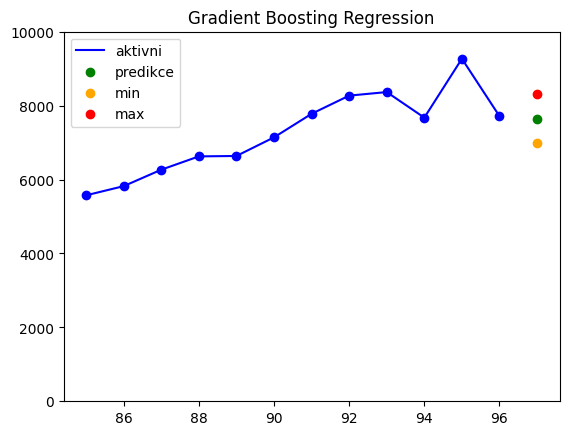

predikce: [7645.89030619]

Model:      GradientBoostingRegressor(loss='absolute_error', n_estimators=50)
Min:        6976
Predikce:   7645
Max:        8315
Rmse:       669



In [17]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df_orig = df.drop(df.index[-12:])

df_new = df.drop(df.index[:-1])
print(df_new[parametry])
df_train = df.drop(df.index[-12:])

x_new = df_new[parametry]
#>> predikce
y_new_pred = gbr.predict(x_new)
#>> graf
plt.figure()
plt.title("Gradient Boosting Regression")
#* realita
plt.plot(X_test.index, df_test['aktivni'],label="aktivni",color="blue")
plt.scatter(X_test.index, df_test['aktivni'],color="blue")
#* predikce
plt.scatter(x_new.index, y_new_pred, label='predikce', color="green")
plt.scatter(x_new.index, y_new_pred - rmse, label="min", color="orange")
plt.scatter(x_new.index, y_new_pred + rmse, label="max", color="red")
plt.legend()
plt.ylim(0,10000)
plt.show()
#>> print
print(f"predikce: {y_new_pred}")
print(f"""
Model:      {gbr}
Min:        {int(y_new_pred-rmse)}
Predikce:   {int(y_new_pred)}
Max:        {int(y_new_pred+rmse)}
Rmse:       {int(rmse)}
""")